# Unsupervised Music Clustering Based on Audio Features

## Problem Statement:
Organizing and exploring massive music libraries has become a challenge. Traditional genre labels are often inconsistent or overly broad, and listeners now tend to explore music based on "vibes" or "moods" rather than genres.

## Goal:
The goal is to use an unsupervised learning approach to automatically cluster songs based on their audio characteristics (like danceability, energy, and acousticness) — without using any explicit genre labels — and discover natural groupings in the music.

## Dataset:
- Source: (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?select=dataset.csv) (via Kaggle)
- Size:  about 114,000 tracks
- Features: 18+ including `danceability`, `energy`, `tempo`, `instrumentalness`, `acousticness`, and more
- Format: CSV file


In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/tracks-csv/dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('/kaggle/input/tracks-csv/dataset.csv')
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [47]:
# Basic exploration
df.shape
df.describe()
df.isnull().sum()

# Drop non-numeric or unhelpful columns
df_cluster = df.drop(columns=['Unnamed: 0', 'track_id', 'track_name', 'artists', 'album_name', 'duration_ms', 'explicit', 'key', 'mode', 'track_genre'])

# Fill any missing numeric values (if necessary)
df_cluster = df_cluster.fillna(df_cluster.mean())

# Normalize features for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


In [48]:
# Check missing values
df.isnull().sum()

# Drop rows with missing values
df.dropna(inplace=True)

# Optional: remove duplicates
df.drop_duplicates(inplace=True)

# Select audio features for clustering
audio_features = [
    'danceability', 'energy', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

X = df[audio_features]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


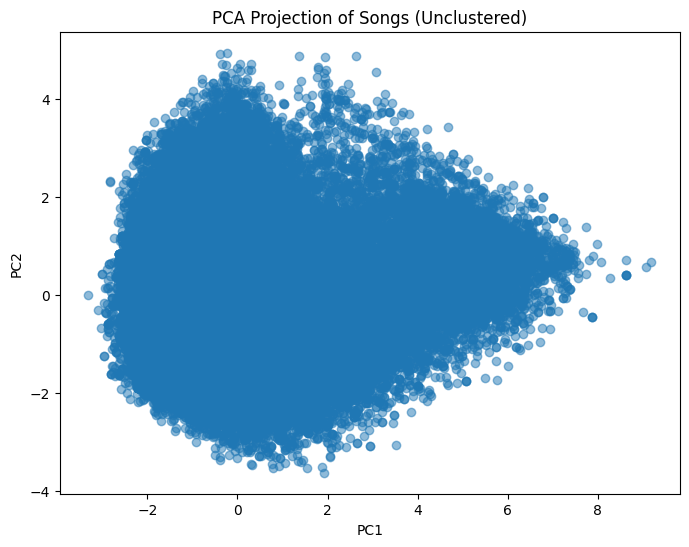

In [49]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Projection of Songs (Unclustered)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [50]:
#### THIS TAKES LIKE 30 MINUTES TO RUN, SO I COMMENTED IT OUT. THE BEST K is 2 WITH A SILHOUETTE SCORE OF 0.2360












# silhouette_scores = []

# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(X_scaled)
#     score = silhouette_score(X_scaled, labels)
#     silhouette_scores.append(score)
#     print(f"Silhouette Score for k={k}: {score:.4f}")

# # Plot silhouette scores
# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.title('Silhouette Scores for KMeans Clustering')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.grid(True)
# plt.show()









In [51]:
# Seems like k=2 is the best option in the silhouette score (0.2360)
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
df['cluster'] = cluster_labels


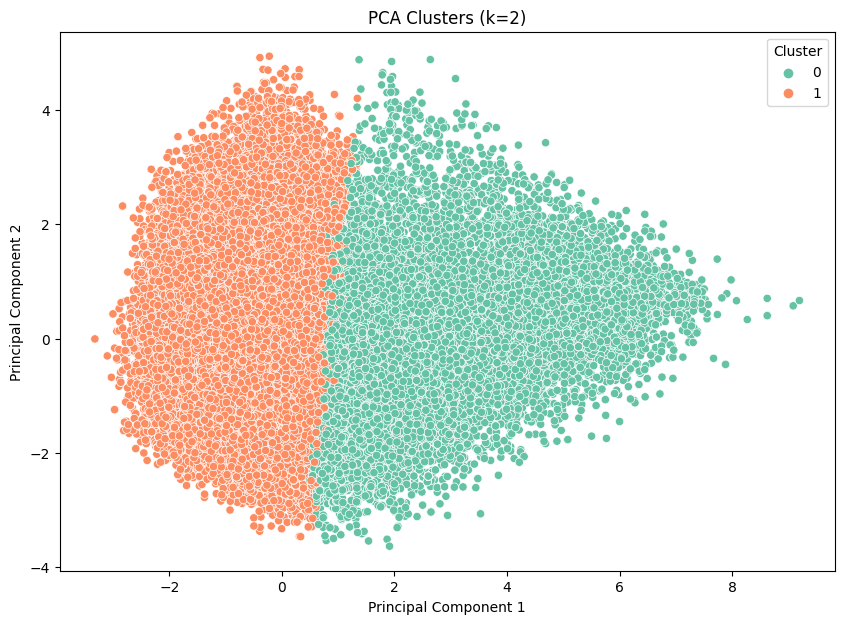

In [52]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2')
plt.title(f'PCA Clusters (k={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [53]:
# Check average values of each feature per cluster
cluster_profiles = df.groupby('cluster')[audio_features].mean()
cluster_profiles


,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,
0,0.471266,0.305848,-14.104512,0.710535,0.057702,0.739261,0.297352,0.177872,0.317441,110.304610
1,0.598119,0.751380,-6.342634,0.613635,0.093487,0.175793,0.109729,0.225251,0.525412,126.030142


In [58]:
# View random songs from each cluster
for i in range(best_k):
    print(f"\nCluster {i} sample tracks:")
    display(df[df['cluster'] == i][['track_name', 'artists']].sample(5))



Cluster 0 sample tracks:


,track_name,artists
90735,Nacimos para Amarnos,Los Tukas
39298,"The Gladiator Waltz - From ""Gladiator"" Soundtrack",Hans Zimmer;Lisa Gerrard;Gavin Greenaway;The L...
112682,Uyan Sunam Uyan,Sukriye Tutkun
26138,All Through the Night - Instrumental,Fred Mollin
76127,O Holy Night,Adolphe Adam;Rolando Villazón;Xavier De Maistre



Cluster 1 sample tracks:


,track_name,artists
9851,Kamayatra,Mandragora
102744,I'm Easy,Boz Scaggs
57850,Mushroom Chocolate (with 6LACK),QUIN;6LACK
60027,Go Down Deh (feat. Shaggy and Sean Paul),Spice;Shaggy;Sean Paul
59459,Atena,Angband


## Conclusion

I applied unsupervised learning (KMeans clustering) to Spotify audio features and identified distinct song clusters. Each cluster likely represents different musical styles or moods (e.g., dance tracks vs. acoustic ballads).

The silhouette score helped me determine the optimal number of clusters (k=2). Visualizing with PCA showed clear separations, suggesting clustering was effective.
